In [99]:
import tensorflow as tf
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.append('../python_scripts/')
import get_frames as gf
import model_generator as mg
from importlib import reload
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import PIL
from keras import backend as K
from keras.optimizers import *
from keras.layers import *
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras import callbacks
from keras.preprocessing.image import Iterator
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from scipy.misc import imresize
import glob
import threading

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<h1> GLOBAL VARIABLE </h1>

In [48]:
PATH_DATA = '../dataset/'

<h1> LOADS IMAGES </h1>

In [15]:
reload(gf)
dataset_number_frames = gf.get_dataset_number_frames()

In [28]:
dataset_number_frames

[autoreload of model_generator failed: Traceback (most recent call last):
  File "D:\Software\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
  File "../python_scripts\model_generator.py", line 31
    def __init__(self, batch_size, len_file, path, size=(120,360), shuffle=False, seed=None,debug2=False):
                                                                                                         ^
IndentationError: unindent does not match any outer indentation level
]


{'../dataset/CLEAR/0/1496613715': 336,
 '../dataset/CLEAR/12/1496614075': 353,
 '../dataset/CLEAR/16/1496614195': 353,
 '../dataset/CLEAR/20/1496614315': 359,
 '../dataset/CLEAR/4/1496613835': 363,
 '../dataset/CLEAR/8/1496613955': 346,
 '../dataset/CLEARING/0/1496617319': 346,
 '../dataset/CLEARING/12/1496617680': 344,
 '../dataset/CLEARING/16/1496617800': 334,
 '../dataset/CLEARING/20/1496617920': 340,
 '../dataset/CLEARING/4/1496617439': 339,
 '../dataset/CLEARING/8/1496617559': 340,
 '../dataset/CLOUDS/0/1496615156': 352,
 '../dataset/CLOUDS/12/1496615517': 357,
 '../dataset/CLOUDS/16/1496615637': 358,
 '../dataset/CLOUDS/20/1496615757': 309,
 '../dataset/CLOUDS/4/1496615276': 352,
 '../dataset/CLOUDS/8/1496615397': 338,
 '../dataset/EXTRASUNNY/0/1496614435': 350,
 '../dataset/EXTRASUNNY/12/1496614796': 353,
 '../dataset/EXTRASUNNY/16/1496614916': 351,
 '../dataset/EXTRASUNNY/20/1496615036': 350,
 '../dataset/EXTRASUNNY/4/1496614556': 317,
 '../dataset/EXTRASUNNY/8/1496614676': 358

In [17]:
reload(gf)
clear_0_frames_path = gf.get_path_to_frames(dataset_number_frames,'../dataset/EXTRASUNNY/12/1496614796')

In [29]:
clear_0_frames_path

['../dataset/EXTRASUNNY/12/1496614796/1.pz',
 '../dataset/EXTRASUNNY/12/1496614796/2.pz',
 '../dataset/EXTRASUNNY/12/1496614796/3.pz',
 '../dataset/EXTRASUNNY/12/1496614796/4.pz',
 '../dataset/EXTRASUNNY/12/1496614796/5.pz',
 '../dataset/EXTRASUNNY/12/1496614796/6.pz',
 '../dataset/EXTRASUNNY/12/1496614796/7.pz',
 '../dataset/EXTRASUNNY/12/1496614796/8.pz',
 '../dataset/EXTRASUNNY/12/1496614796/9.pz',
 '../dataset/EXTRASUNNY/12/1496614796/10.pz',
 '../dataset/EXTRASUNNY/12/1496614796/11.pz',
 '../dataset/EXTRASUNNY/12/1496614796/12.pz',
 '../dataset/EXTRASUNNY/12/1496614796/13.pz',
 '../dataset/EXTRASUNNY/12/1496614796/14.pz',
 '../dataset/EXTRASUNNY/12/1496614796/15.pz',
 '../dataset/EXTRASUNNY/12/1496614796/16.pz',
 '../dataset/EXTRASUNNY/12/1496614796/17.pz',
 '../dataset/EXTRASUNNY/12/1496614796/18.pz',
 '../dataset/EXTRASUNNY/12/1496614796/19.pz',
 '../dataset/EXTRASUNNY/12/1496614796/20.pz',
 '../dataset/EXTRASUNNY/12/1496614796/21.pz',
 '../dataset/EXTRASUNNY/12/1496614796/22.pz

0.3222384750843048 0.0 -5.170791333358575e-42 0.0
(640, 1280, 3)


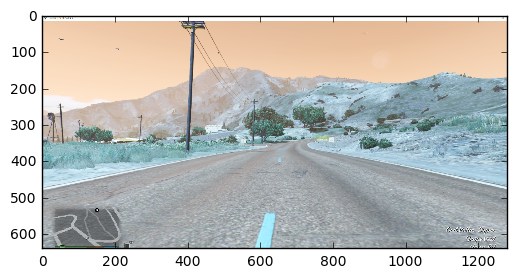

1.4048237800598145 0.0 -5.170791333358575e-42 0.0
(640, 1280, 3)


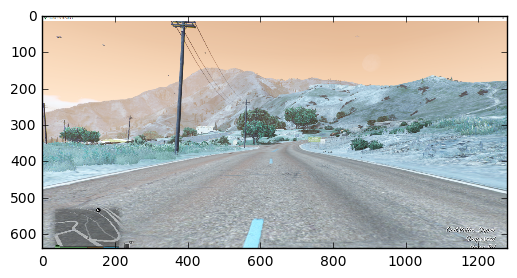

3.077777147293091 0.0 -5.170791333358575e-42 0.0
(640, 1280, 3)


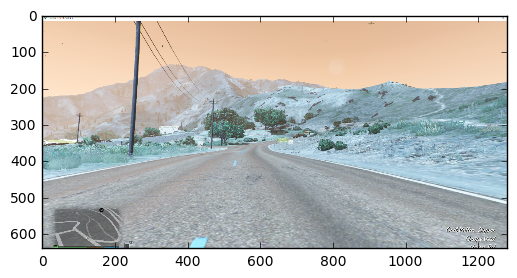

5.081750869750977 0.0 -5.170791333358575e-42 0.0
(640, 1280, 3)


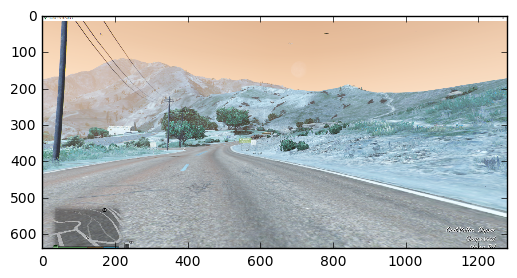

7.20331335067749 0.0 -5.170791333358575e-42 0.0
(640, 1280, 3)


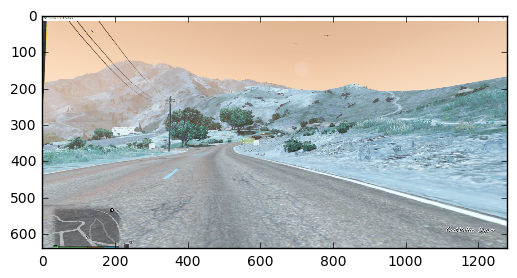

In [18]:
reload(gf)
dict_keys = ['frame','speed','throttle','steering','brake']
for path in clear_0_frames_path[:5]:
    frame = gf.get_frame(path)
    print(frame['speed'],frame['throttle'],frame['steering'],frame['brake'])
    plt.imshow(frame['frame'])
    print(frame['frame'].shape)
    plt.show()

In [30]:
frame['frame'].shape

(640, 1280, 3)

<h1> CREATE GENERATOR </h1>

0
[  0.00000000e+00   0.00000000e+00  -5.17079133e-42]


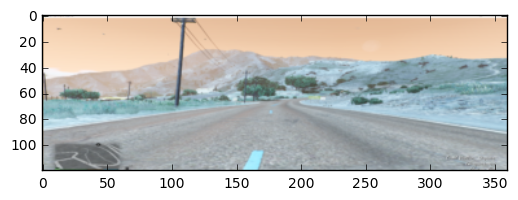

[  0.00000000e+00   0.00000000e+00  -5.17079133e-42]


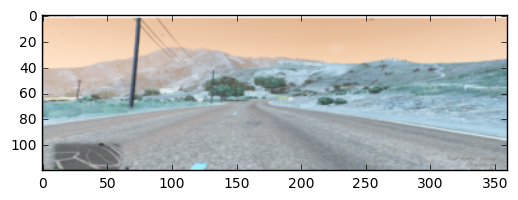

[  0.00000000e+00   0.00000000e+00  -5.17079133e-42]


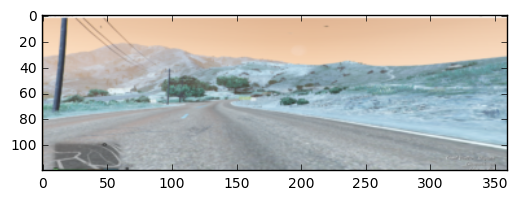

[  0.00000000e+00   0.00000000e+00  -5.17079133e-42]


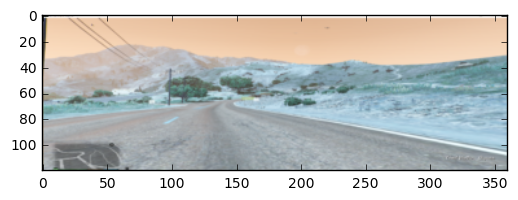

3
1
[  0.00000000e+00   0.00000000e+00  -5.17079133e-42]


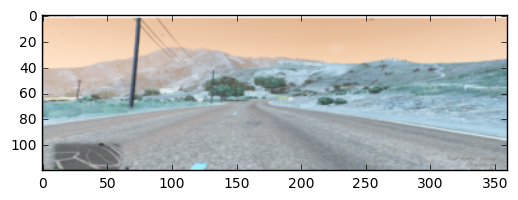

[  0.00000000e+00   0.00000000e+00  -5.17079133e-42]


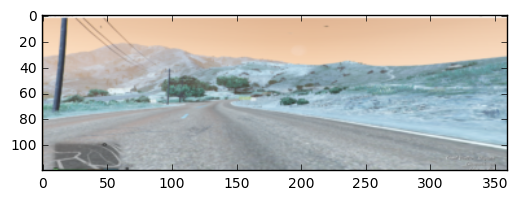

[  0.00000000e+00   0.00000000e+00  -5.17079133e-42]


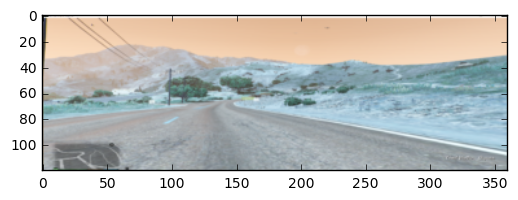

[  0.00000000e+00   0.00000000e+00  -5.17079133e-42]


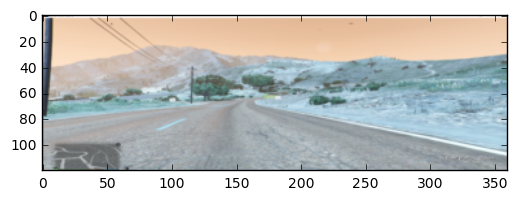

3
2
[  0.00000000e+00   0.00000000e+00  -5.17079133e-42]


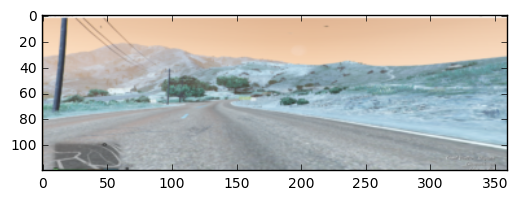

[  0.00000000e+00   0.00000000e+00  -5.17079133e-42]


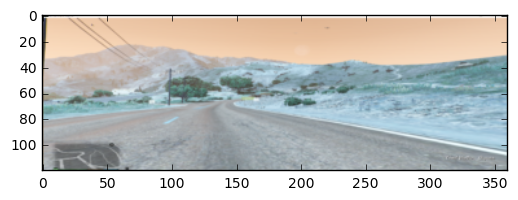

[  0.00000000e+00   0.00000000e+00  -5.17079133e-42]


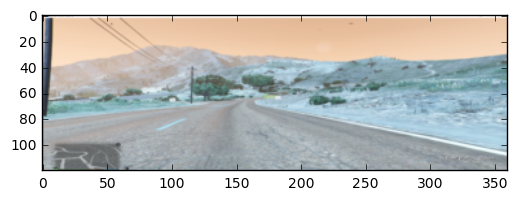

[  0.00000000e+00   0.00000000e+00  -5.09271899e-42]


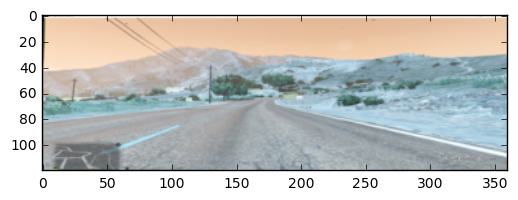

3
3
[  0.00000000e+00   0.00000000e+00  -5.17079133e-42]


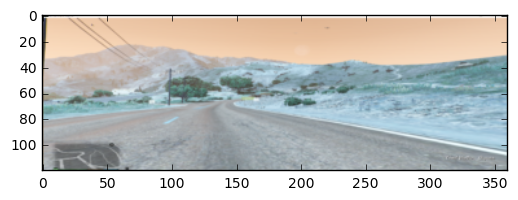

[  0.00000000e+00   0.00000000e+00  -5.17079133e-42]


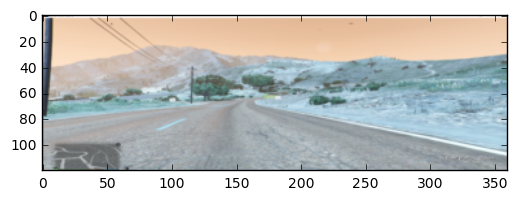

[  0.00000000e+00   0.00000000e+00  -5.09271899e-42]


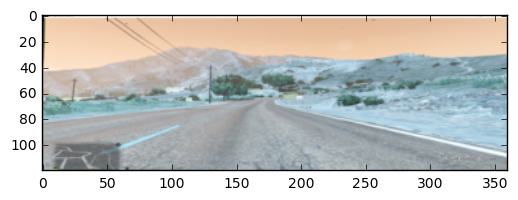

[  0.00000000e+00   0.00000000e+00  -5.09271899e-42]


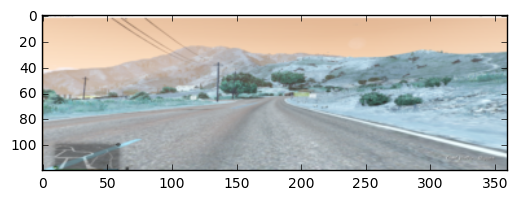

3


In [123]:
import model_generator as md
j = 0
for X,Y in md.SequentialUniqueConditionIterator(4,len(clear_0_frames_path),'../dataset/EXTRASUNNY/12/1496614796'):
    print(j)
    for i,x in enumerate(X):
        print(Y[i])
        plt.imshow(x)
        plt.show()
    j+=1
    print(i)
    if j>3:
        break

In [77]:
class RandomWeatherIterator(Iterator):

    def __init__(self, batch_size, dataset_path, hour=None, size=(120,360), shuffle=False, seed=None,debug2=False):
        self._batch_size=batch_size   
        self._dataset_path = dataset_path
        self._size = size
        print(self._dataset_path)
        self._weathers = [f for f in os.listdir(self._dataset_path) if f[0].upper() == f[0]]
        self._selected_weather = np.random.choice(self._weathers)
        self._files = [f.replace('\\','/') for f in glob.glob(self._dataset_path+self._selected_weather+'/*/*')]
        super(RandomWeatherIterator, self).__init__(, batch_size, shuffle, seed)

    def next(self):
        with self.lock:
            index_array, current_index, current_batch_size = next(self.index_generator)
        

        
        ##paths = gf.create_paths(self._path,index_array,True)
        #data = gf.load_data_from_paths(paths,select=True)
        #X = np.array([imresize(d['frame'],self._size) for d in data])
        #Y = np.array([[d['throttle'],d['brake'],d['steering']] for d in data]) 
        return self._files

In [78]:
import model_generator as md
for x in RandomWeatherIterator(10,PATH_DATA):
    print(x)
    break

../dataset/
['../dataset/SMOG/0/1496618761', '../dataset/SMOG/12/1496619122', '../dataset/SMOG/16/1496619242', '../dataset/SMOG/20/1496619362', '../dataset/SMOG/4/1496618881', '../dataset/SMOG/8/1496619002']
